In [143]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib as plt

# Raspando dados com python(web scraping)
## Melhores filmes do Tarantino no site da imdb
https://www.imdb.com/list/ls020710066/

In [112]:
url = 'https://www.imdb.com/list/ls020710066/'

In [113]:
r = requests.get(url)

In [114]:
soup = BeautifulSoup(r.content, 'html.parser')

In [115]:
filme_container = soup.find_all('div', class_ = 'lister-item mode-detail')
print(type(filme_container))
print(len(filme_container))

<class 'bs4.element.ResultSet'>
10


In [116]:
first_filme = filme_container[0]
first_filme

<div class="lister-item mode-detail">
<div class="lister-item-image ribbonize" data-tconst="tt0110912">
<a href="/title/tt0110912/"> <img alt="Pulp Fiction: Tempo de Violência" class="loadlate" data-tconst="tt0110912" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BNGNhMDIzZTUtNTBlZi00MTRlLWFjM2ItYzViMjE3YzI5MjljXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY209_CR2,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="140"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0110912/">Pulp Fiction: Tempo de Violência</a>
<span class="lister-item-year text-muted unbold">(1994)</span>
</h3>
<p class="text-muted text-small">
<span class="certificate">18</span>
<span class="ghost">|</span>
<span class="runtime">154 min</span>
<span class="ghost">|</span>
<span class="genre">
Crime, Drama            </spa

In [117]:
first_filme.div

<div class="lister-item-image ribbonize" data-tconst="tt0110912">
<a href="/title/tt0110912/"> <img alt="Pulp Fiction: Tempo de Violência" class="loadlate" data-tconst="tt0110912" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BNGNhMDIzZTUtNTBlZi00MTRlLWFjM2ItYzViMjE3YzI5MjljXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY209_CR2,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="140"/>
</a> </div>

In [118]:
first_filme.div.a

<a href="/title/tt0110912/"> <img alt="Pulp Fiction: Tempo de Violência" class="loadlate" data-tconst="tt0110912" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BNGNhMDIzZTUtNTBlZi00MTRlLWFjM2ItYzViMjE3YzI5MjljXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY209_CR2,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="140"/>
</a>

In [119]:
first_filme.h3.a

<a href="/title/tt0110912/">Pulp Fiction: Tempo de Violência</a>

In [120]:
first_name = first_filme.h3.a.text
first_name

'Pulp Fiction: Tempo de Violência'

In [121]:
first_year = first_filme.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(1994)</span>

In [122]:
first_year = first_year.text
first_year

'(1994)'

In [123]:
first_imdb = float(first_filme.find_all('span', class_ ='ipl-rating-star__rating')[0].text)
first_imdb

8.9

In [124]:
f_voto = first_filme.find('span', attrs = {'name':'nv'})
f_voto

<span data-value="1744930" name="nv">1,744,930</span>

In [125]:
f_voto['data-value']

'1744930'

In [126]:
f_voto = int(f_voto['data-value'])
f_voto

1744930

In [127]:
f_mtscore = first_filme.find('span', class_ = 'metascore favorable').text
f_mtscore

'94        '

In [128]:
f_mtscore = int(f_mtscore)
print(f_mtscore)

94


In [165]:
names = []
years = []
votos = []
imdb_ratings = []

In [130]:
for container in filme_container:
    # The name
    name = container.h3.a.text
    names.append(name)
        
    # The year
    year = container.h3.find('span', class_ = 'lister-item-year').text
    years.append(year)
        
    # The IMDB rating
    imdb = float(container.find_all('span', class_ ='ipl-rating-star__rating')[0].text)
    imdb_ratings.append(imdb)
    
        
    # The number of votes
    vote = container.find('span', attrs = {'name':'nv'})['data-value']
    votos.append(int(vote))

In [131]:
a = {'Filme': names,
                   'Ano': years,
                   'Nota': imdb_ratings,
                   'Votos': votos}

In [139]:
tst = pd.DataFrame.from_dict(a, orient='index')

In [140]:
filmes_by_tarantino = tst.transpose().tail(10)

In [141]:
filmes_by_tarantino

,Filme,Ano,Nota,Votos
0,Pulp Fiction: Tempo de Violência,(1994),8.9,1744930
1,Bastardos Inglórios,(2009),8.3,1200534
2,Django Livre,(2012),8.4,1286558
3,Kill Bill: Volume 1,(2003),8.1,958229
4,Kill Bill: Volume 2,(2004),8,655010
5,Os Oito Odiados,(2015),7.8,484670
6,Era Uma Vez em... Hollywood,(2019),7.7,444653
7,Cães de Aluguel,(1992),8.3,878559
8,À Prova de Morte,(2007),7,258984
9,Jackie Brown,(1997),7.5,302835


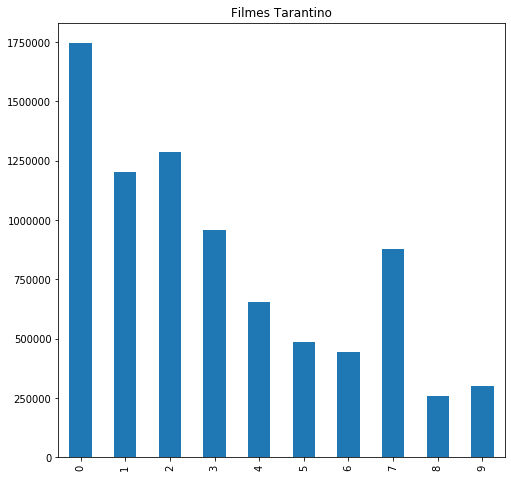

In [164]:
filmes_by_tarantino['Votos'].plot(kind='bar', title='Filmes Tarantino', figsize=(8, 8))